**運用第三方函式庫face_recognition進行人臉辨識**

辨識陳奕迅Eason, 周杰倫Jay, 林志玲Chiling, 新垣結衣Yuli


In [ ]:
!apt update
!apt install -y cmake
!pip install face_recognition
import face_recognition

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
Get:12 https://developer.downlo

In [ ]:
# 掛載google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 載入已知人臉的檔案
import glob
known = glob.glob('/content/drive/MyDrive/MySideProject/face_recognition/known_person/*')
known

['/content/drive/MyDrive/MySideProject/face_recognition/known_person/Eason.jpg',
 '/content/drive/MyDrive/MySideProject/face_recognition/known_person/Jay.jpg',
 '/content/drive/MyDrive/MySideProject/face_recognition/known_person/Chiling.jpeg',
 '/content/drive/MyDrive/MySideProject/face_recognition/known_person/Yui.jpg']

In [ ]:
# 載入未知人臉的檔案
unknown = glob.glob('/content/drive/MyDrive/MySideProject/face_recognition/unknown_person/*')
unknown

['/content/drive/MyDrive/MySideProject/face_recognition/unknown_person/unknown2.jpg',
 '/content/drive/MyDrive/MySideProject/face_recognition/unknown_person/unknown3.jpg',
 '/content/drive/MyDrive/MySideProject/face_recognition/unknown_person/unknown1.jpeg',
 '/content/drive/MyDrive/MySideProject/face_recognition/unknown_person/unknown6.jpg',
 '/content/drive/MyDrive/MySideProject/face_recognition/unknown_person/unknown7.jpeg',
 '/content/drive/MyDrive/MySideProject/face_recognition/unknown_person/unknown8.jpg',
 '/content/drive/MyDrive/MySideProject/face_recognition/unknown_person/unknown9.jpg',
 '/content/drive/MyDrive/MySideProject/face_recognition/unknown_person/unknown10.jpg',
 '/content/drive/MyDrive/MySideProject/face_recognition/unknown_person/unknown5.jpg',
 '/content/drive/MyDrive/MySideProject/face_recognition/unknown_person/unknown4.jpeg']

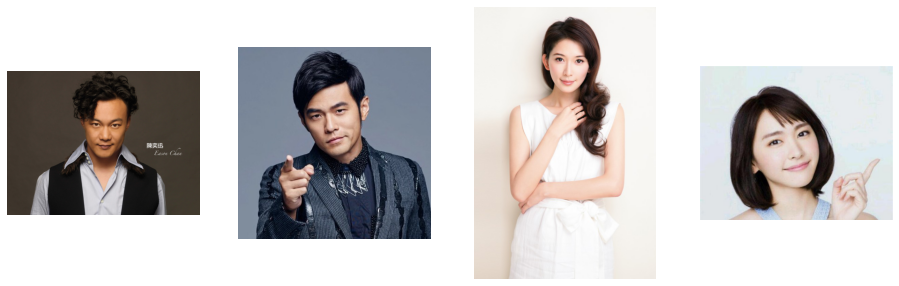

In [ ]:
import face_recognition
# 圖像函式庫: PIL(basic), OpenCV(advanced)
import cv2
import matplotlib.pyplot as plt
% matplotlib inline
import os
encodinglist = []
labels= []

width = 5
height = int(len(known)/ width) + 1
plt.figure(figsize=(20,5))
for (i, f) in enumerate(known):
  # Step1. 讀取檔案
  img = face_recognition.load_image_file(f)
  # Step2. 算出臉的降維向量, 用已然作好的cnn, [0]第一張臉
  face_encoding = face_recognition.face_encodings(img)[0]
  # Step3. 抓出人臉的框框
  (top, right, bottom, left) = face_recognition.face_locations(img, model='cnn')[0]
  # Step4. 把它加到自己準備的list裡
  encodinglist.append(face_encoding)
  # Step5. 把檔名前面的人名split出來
  name = os.path.split(f)[-1].split('.')[0]
  # Step6. 把人名到自己準備的list裡
  labels.append(name)
  plt.subplot(height, width, i+1)
  plt.axis('off')
  plt.imshow(img)

In [ ]:
# 任選一張照片印出其128維
encodinglist[1]

array([-6.31620809e-02,  1.72011748e-01,  2.39610299e-02,  1.93003565e-04,
       -1.25967190e-01, -1.68311764e-02, -5.27801886e-02, -8.57563466e-02,
        9.92715061e-02, -2.29730941e-02,  1.91115677e-01,  2.29994319e-02,
       -2.00920373e-01, -1.31533593e-01, -5.59247434e-02,  1.53018042e-01,
       -1.93971083e-01, -1.48685396e-01, -2.90947892e-02, -1.42805371e-02,
        1.66911751e-01,  2.76972912e-02,  8.23950022e-02,  3.38315405e-02,
       -5.31239770e-02, -3.75601530e-01, -4.44884524e-02, -8.36166292e-02,
        5.13335429e-02, -4.87850830e-02, -3.22925895e-02,  7.68856425e-03,
       -2.51588821e-01, -9.34868455e-02,  4.43386175e-02,  9.67731029e-02,
       -1.65626556e-02, -8.66436660e-02,  1.72591448e-01, -1.37274954e-02,
       -2.01545939e-01,  1.03480890e-01,  2.28371434e-02,  2.79300243e-01,
        2.15709791e-01,  3.43916155e-02,  5.42636551e-02, -1.14774242e-01,
        1.24691658e-01, -1.96192935e-01,  8.75415727e-02,  1.71638697e-01,
        7.51183927e-02,  

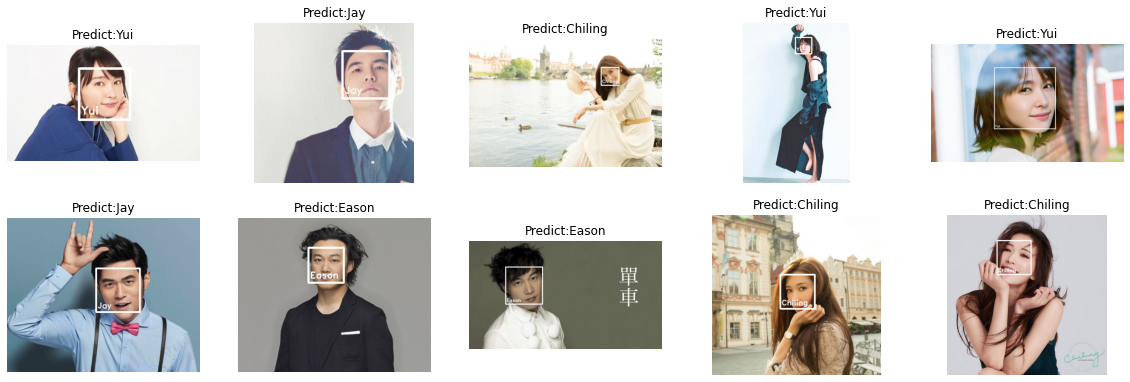

In [ ]:
import numpy as np
plt.figure(figsize=(20,10))
width = 5
height = int(len(unknown)/ width) + 1
for (i, f) in enumerate(unknown):
  img = face_recognition.load_image_file(f)
  face_encoding = face_recognition.face_encodings(img)[0]
  # (top, right, bottom, left)
  (top, right, bottom, left) = face_recognition.face_locations(img, model='cnn')[0]
  # rectangle (畫圖, 左上, 右下, 顏色, 粗細)
  cv2.rectangle(img, (left, top), (right, bottom), (255,255,255), 5)
  font = cv2.FONT_HERSHEY_DUPLEX
  # face_distance: 算傳進去的encodinglist每一個距離
  results = face_recognition.face_distance(encodinglist, face_encoding)
  # 這裡使用argmin(axis=-1) 稍難, 是得到群集裡最小值的index 部分
  name = labels[np.array(results).argmin(axis=-1)]
  labels.append(name)
  # 把文字放到圖上
  cv2.putText(img, name, (left + 6, bottom -15), font, 1, (255,255,255), 2)
  plt.subplot(height, width, i+1)
  plt.title('Predict:' + name)
  plt.axis('off')
  plt.imshow(img)


In [ ]:
# 把所有臉的距離列出來, 最小值基本上就是我們的答案
results = face_recognition.face_distance(encodinglist, face_encoding)
results

array([0.66215626, 0.68117336, 0.39850771, 0.51087113])